## 1. Introduction
- **Objective:** Understand customer purchasing behavior and the impact of various factors on sales.
- **Dataset Overview:** Description of dataset features and target variable.


## 2. Data Loading and Setup


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import logging
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Imported libraries and configured logging.")

2024-09-21 19:16:44,446 - INFO - Imported libraries and configured logging.


In [2]:
# Import load_data
from load_data import load_data
if __name__ == "__main__":
    # Define file paths and names
    zip_file_path = '../data.zip'
    extract_to_folder = '../data'
    train = 'train.csv'  # Replace with the actual file name if different
    test = 'test.csv'
    store = 'store.csv'

    # Load the dataset
    try:
        train_data = load_data(zip_file_path, train, extract_to_folder)
        test_data = load_data(zip_file_path, test, extract_to_folder)
        store_data =  load_data(zip_file_path, store, extract_to_folder)
        print("Data successfully loaded.")
        display(train_data.head())
    except FileNotFoundError as e:
        print(e)
logger.info("Data loaded successfully.")

/home/noh/10Academy/rossmann-pharma-sales-prediction/scripts/load_data.py:30: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, index_col=0)


Data successfully loaded.


,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


2024-09-21 19:17:03,260 - INFO - Data loaded successfully.


In [3]:
# Explore the testing data
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0


In [4]:
# Explore the store dataset
store_data.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Now, merge the store dataset with the  train and test dataset on the same store to have rich set of data for analysis


In [5]:
logger.info("Merge the store data with train and test dataset")
# Merge store and train data
_train_data = train_data.merge(store_data, on='Store', how='left')
# Merege store and test data
_test_data = test_data.merge(store_data, on='Store', how='left')


2024-09-21 19:17:18,416 - INFO - Merge the store data with train and test dataset


In [6]:
# Now let's explore to understand the nature of the merged data
_train_data.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# Info the train data
_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2              

In [8]:
logger.info("Checking statistical summary of numerical data.")
# Statistical summary of numerical data
display(train_data.describe())
display(test_data.describe())

2024-09-21 19:17:37,362 - INFO - Checking statistical summary of numerical data.


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,0.854322,0.395833,0.443487
std,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,279.750000,2.000000,1.000000,0.000000,0.000000
50%,553.500000,4.000000,1.000000,0.000000,0.000000
75%,832.250000,6.000000,1.000000,1.000000,1.000000
max,1115.000000,7.000000,1.000000,1.000000,1.000000


In [9]:
# Check the shape of the dataset
print(f'Shape of training dataset:{_train_data.shape}')
print(f'Shape of testing dataset:{_test_data.shape} ')

Shape of training dataset:(1017209, 17)
Shape of testing dataset:(41088, 16) 


In [10]:
logger.info("Checking the types of both test and train data")
from data_processing import DataProcessing

# Create instance of the class
train_data = _train_data.copy()
test_data = _test_data.copy()
process = DataProcessing(test_data, train_data)
# Check the types of both test and train data
process.check_data_types()


2024-09-21 19:17:50,324 - INFO - Checking the types of both test and train data


Training Dataset Data Types:

DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


Test Dataset Data Types:

Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Ass

In [11]:
# Convert the Date column to datetime64 in both training and testing dataset
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

Handle Missing Data

- Identify missing values in critical features like `CompetitionDistance`, `Promo2Since`, and `Sales`.
- Impute missing values (e.g., forward-filling for time-based variables or using median/mean for continuous features).



In [12]:
logger.info("Checking the missing values")
# Check missing values
print('Summary of Missing Values in Train Data.')
display(process.missing_data_summary(train_data))
print('Summary of Missing Values in Test Data.')
display(process.missing_data_summary(test_data))


2024-09-21 19:18:09,446 - INFO - Checking the missing values


Summary of Missing Values in Train Data.


,Missing Count,Percentage (%)
Promo2SinceWeek,508031,49.943620
Promo2SinceYear,508031,49.943620
PromoInterval,508031,49.943620
CompetitionOpenSinceMonth,323348,31.787764
CompetitionOpenSinceYear,323348,31.787764
CompetitionDistance,2642,0.259730


Summary of Missing Values in Test Data.


,Missing Count,Percentage (%)
Promo2SinceWeek,17232,41.939252
Promo2SinceYear,17232,41.939252
PromoInterval,17232,41.939252
CompetitionOpenSinceMonth,15216,37.032710
CompetitionOpenSinceYear,15216,37.032710
CompetitionDistance,96,0.233645
Open,11,0.026772


Drop columns such as `Promo2SinceWeek`, `Promo2SinceYear` since high percentage of the data values are missing.

In [13]:
logger.info("Drop columns having high missing percentage")
# List of columns to drop
cols_to_drop = ['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']

# Drop specified columns from both datasets
train_data.drop(columns=cols_to_drop, axis=1, inplace=True)
test_data.drop(columns=cols_to_drop, axis=1, inplace=True)

2024-09-21 19:18:15,665 - INFO - Drop columns having high missing percentage


`CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear` (31.78% missing)

- Impact: A substantial portion of the data is missing, but these columns provide useful information about when competition started, which can affect sales trends.

In [14]:
logger.info("Impute the missing of Computition open year and month")
# Imputing missing values for 'CompetitionOpenSinceMonth' with mode
competition_month_mode = train_data['CompetitionOpenSinceMonth'].mode()[0]
train_data.fillna({'CompetitionOpenSinceMonth':competition_month_mode}, inplace=True)

# Imputing missing values for 'CompetitionOpenSinceYear' with mode
competition_year_mode = train_data['CompetitionOpenSinceYear'].mode()[0]
train_data.fillna({'CompetitionOpenSinceYear':competition_year_mode}, inplace=True)


2024-09-21 19:18:22,036 - INFO - Impute the missing of Computition open year and month


In [15]:
train_data.isnull().sum()

DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
StoreType                       0
Assortment                      0
CompetitionDistance          2642
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
dtype: int64

Impute low missing values with media becuase it is less sensetive to outliers

In [16]:
logger.info("Impute CompetitionDistance with median")
# Impute CompetitionDistance with median
# Store missing CompetitionDistance for later analysis
missing_competition = train_data[train_data['CompetitionDistance'].isna()]

train_data.fillna({'CompetitionDistance':train_data['CompetitionDistance'].median()}, inplace=True)
test_data.fillna({'CompetitionDistance':test_data['CompetitionDistance'].median()}, inplace=True)
        
# Impute Open column in test data with mode
test_data.fillna({'Open':test_data['Open'].mode()[0]}, inplace=True)

2024-09-21 19:18:34,379 - INFO - Impute CompetitionDistance with median


**Detect Outliers using Boxplot**

Detecting and handling outliers in data is crucial because outliers can distort statistical analyses and machine learning models. The steps and methods to detect and handle outliers depend on the characteristics of the data, and not every variable needs to be checked. Usually, numerical variables are the primary focus for outlier detection.

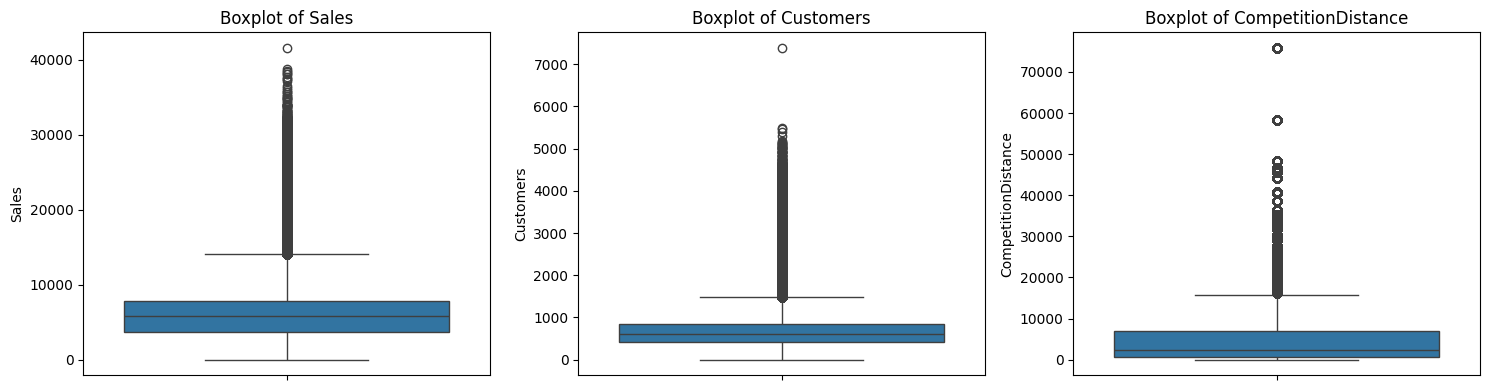

In [17]:
# Define the variables for outlier detection
variables = ['Sales', 'Customers', 'CompetitionDistance']
# Check outliers
process.check_outlier(variables)


**Summary**

- Both 'Sales' and 'Customers' have a similar pattern of outliers which are significantly higher than the main clusters of data. These outliers might indicate days with unusually high sales or customer visits, possibly due to promotions, holidays, or special events.

CompetitionDistance:

- The 'CompetitionDistance' variable shows outliers that are very far away from the main cluster, suggesting some stores are exceptionally far from their nearest competitor.

**Handle Outliers**

- **Capping**: Applying capping with IQR-based 

In [18]:
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    
    return lower_bound, upper_bound

# Cap outliers using IQR
sales_lower, sales_upper = cap_outliers_iqr(train_data, 'Sales')

customers_lower, customers_upper = cap_outliers_iqr(train_data, 'Customers')
distance_lower, distance_upper = cap_outliers_iqr(train_data, 'CompetitionDistance')
test_distance_lower, test_distance_upper = cap_outliers_iqr(test_data, 'CompetitionDistance')


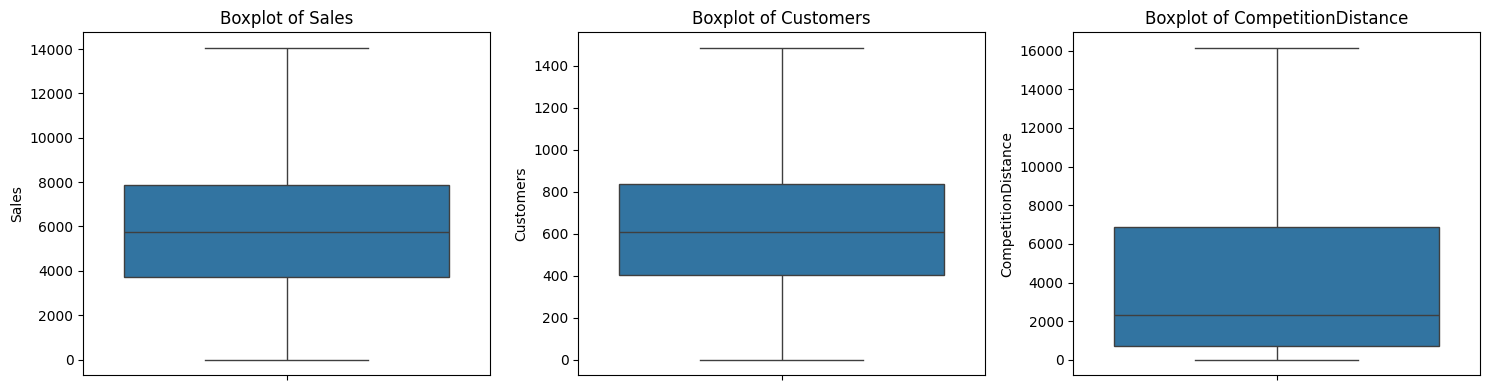

In [19]:
# Check outliers once the outlier are handled
process.check_outlier(variables)

### EDA-Exploratory Analysis

Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [20]:
logger.info('Importing the visualyzer class from scripts')
# Import the Analyzer class
from data_visualization import Visualyzer
# Create instance of EDAnalyzer
vlyr = Visualyzer(train_data, test_data)

2024-09-21 19:19:00,715 - INFO - Importing the visualyzer class from scripts


2024-09-21 19:19:06,989 - INFO - Checking the distribtion of promotions


Promo Contingency Table:
 Dataset   Test   Train
Promo                 
0        24824  629129
1        16264  388080

Chi-square test for Promo: p-value = 4.882118480134891e-09


2024-09-21 19:19:08,767 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:08,859 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:08,892 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:08,898 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Promo2 Contingency Table:
 Dataset   Test   Train
Promo2                
0        17232  508031
1        23856  509178
Chi-square test for Promo2: p-value = 4.761154333295861e-222
Training Promo Distribution:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Testing Promo Distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64
Training Promo2 Distribution:
 Promo2
1    0.500564
0    0.499436
Name: proportion, dtype: float64
Testing Promo2 Distribution:
 Promo2
1    0.580607
0    0.419393
Name: proportion, dtype: float64


2024-09-21 19:19:08,936 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:08,943 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:08,974 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:08,981 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


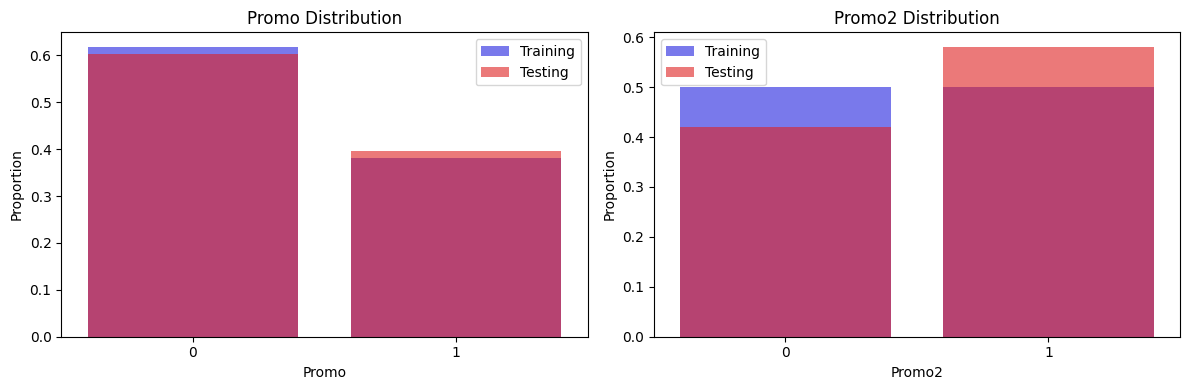

In [21]:
logger.info('Checking the distribtion of promotions')
# Check the distributions
vlyr.check_promotion_distribution()


**Summary**

- `Promo`: The distributions of one-time promotions (Promo) in both the training and testing sets are quite similar, indicating that the data is balanced regarding these promotions.

- `Promo2`: There is a significant difference in the distributions of long-term promotions (`Promo2`). The training set shows a higher proportion of stores not participating in the promotion (`Promo2 = 0`), while the testing set has a higher proportion of participating stores (`Promo2 = 1`).


Check & compare sales behavior before, during, and after holidays


2024-09-21 19:19:13,446 - INFO - Comparing sales behavior


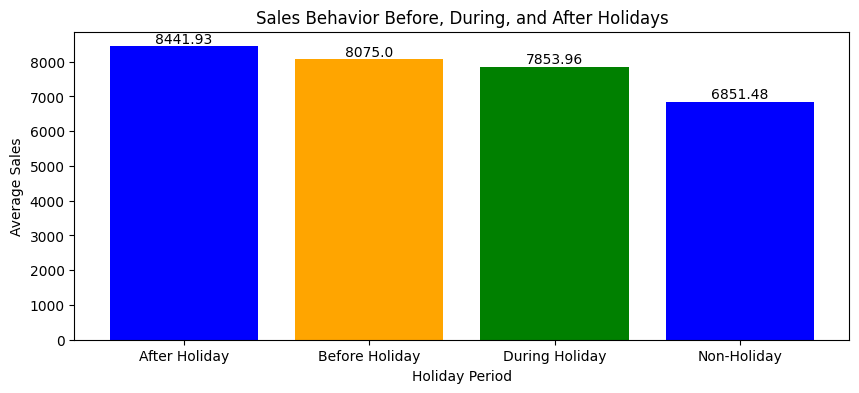

In [22]:
logger.info('Comparing sales behavior')
# Compare sales behaviour
vlyr.compare_sales_behavior()

**Summary**

**Sales After Holidays:**

 - Sales are slightly higher after holidays compared to other periods. This could suggest increased shopping activity once stores re-open after holiday closures.

**Sales Before Holidays:**

- Sales remain high before holidays, which might be due to customers preparing for the holiday period, stocking up on products in anticipation of closures or celebrations.

**Sales During Holidays:**

- Sales during the holiday period are similar to those before and after, indicating that some stores remain open or there is sustained consumer activity during the holiday season.

**Sales on Non-Holidays:**

- The average sales during non-holiday periods are noticeably lower than during holiday-related periods.  - This suggests that holidays have a strong positive impact on customer activity and sales.

Find out any seasonal (Christmas, Easter, etc) purchase behaviors

2024-09-21 19:19:19,942 - INFO - Finding seasonal sales behavior


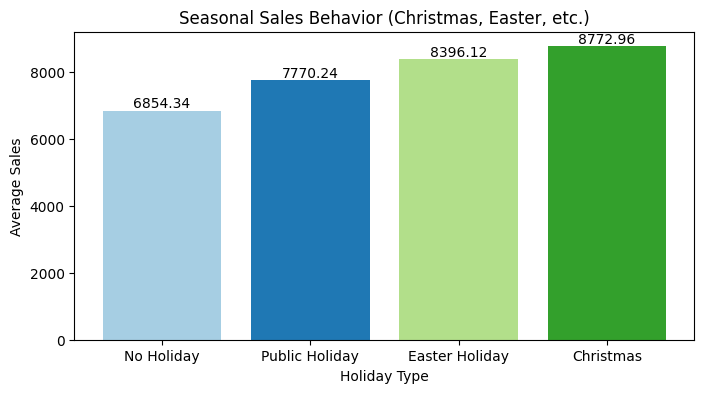

In [23]:
logger.info('Finding seasonal sales behavior')
# Find seasonal sales behavior
vlyr.seasonal_sales_behavior()

**Summary**

- **Easter and Christmas** have the highest average sales, indicating that customers tend to shop more during these holidays.

- **Public holidays** also show a significant increase in sales compared to regular days.

- **Non-holiday** days have the lowest average sales, which is expected since holidays generally drive more consumer spending.

What can you say about the correlation between sales and the number of customers?


2024-09-21 19:19:26,488 - INFO - Comparing the correlation between Sales and Customers


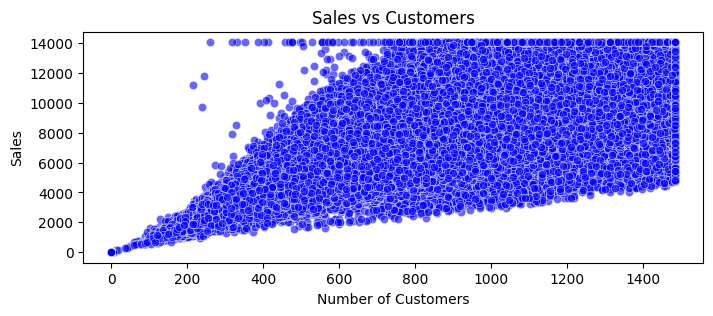

In [24]:
logger.info('Comparing the correlation between Sales and Customers')
# Scatter plot to visualize Sales vs Customers
plt.figure(figsize=(8, 3))
sns.scatterplot(x='Customers', y='Sales', data=train_data, color='blue', alpha=0.6)

# Add labels and title
plt.title('Sales vs Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')

plt.show()


**Summary**

- **Upward Trend:** Sales generally increase as the number of customers rises, as shown by the upward slope of the data points.

- **Clustering:** The data points cluster around a general upward trendline, suggesting a consistent relationship.

- **Outliers:** Although a few outliers deviate notably from the trend, they do not substantially impact the overall positive correlation.

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


Analyze the Effect of Each Promo Type

2024-09-21 19:19:33,267 - INFO - Analyzing the effect of each Promo type


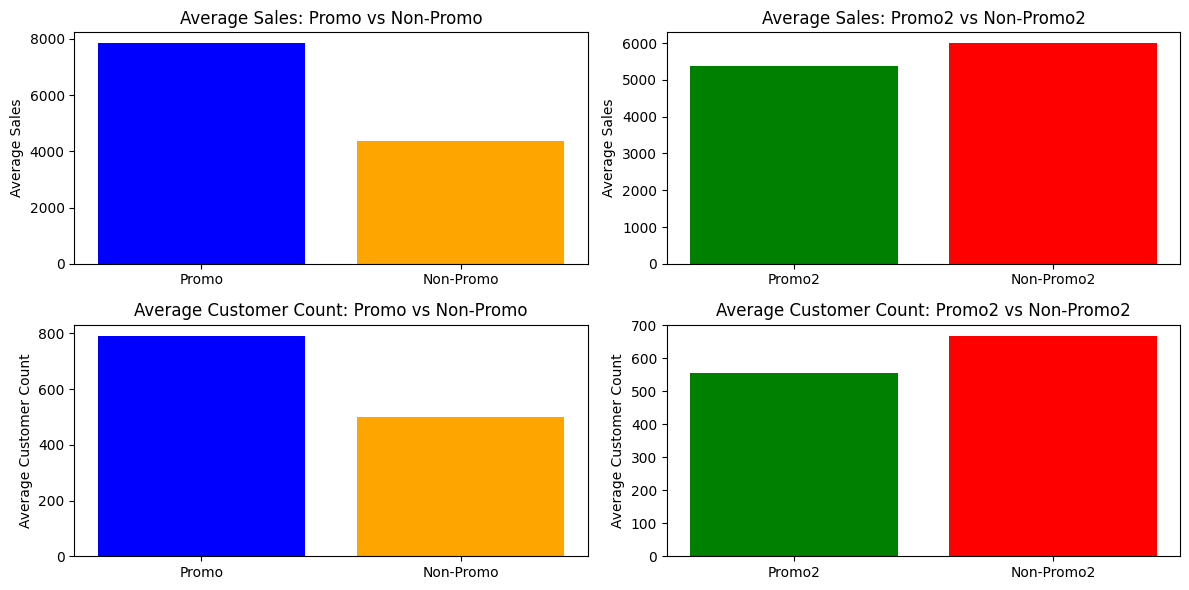

In [25]:
logger.info('Analyzing the effect of each Promo type')
# Plot the average sales and cstomer in each promotion type
vlyr.plot_promo_impact()

**Summary**

**Impact of Promotions on Sales**

- **Promo:** Stores running promotions (Promo=1) see significantly higher sales compared to those not running promotions (Promo=0). This indicates that promotions effectively boost sales.

- **Promo2:** Stores with ongoing promotions (Promo2=1) have slightly lower sales than those without (Promo2=0). This suggests that long-term or consecutive promotions might be less effective, potentially due to diminishing returns over time.

**Impact of Promotions on Existing Customers**

- **Promotional Effectiveness:** Both promotional types (Promo and Promo2) attract more customers, with Promo having a stronger impact. This shows that promotional activities are successful in increasing customer traffic.

- **Long-Term Promotions:** Although Promo2 continues to attract more customers, the increase is less pronounced compared to Promo. This indicates that while ongoing promotions still attract additional customers, their effectiveness may diminish over time.

Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


2024-09-21 19:19:39,587 - INFO - Identifying high impact stores in each promotion types
2024-09-21 19:19:40,564 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:40,566 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:40,576 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 19:19:40,578 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


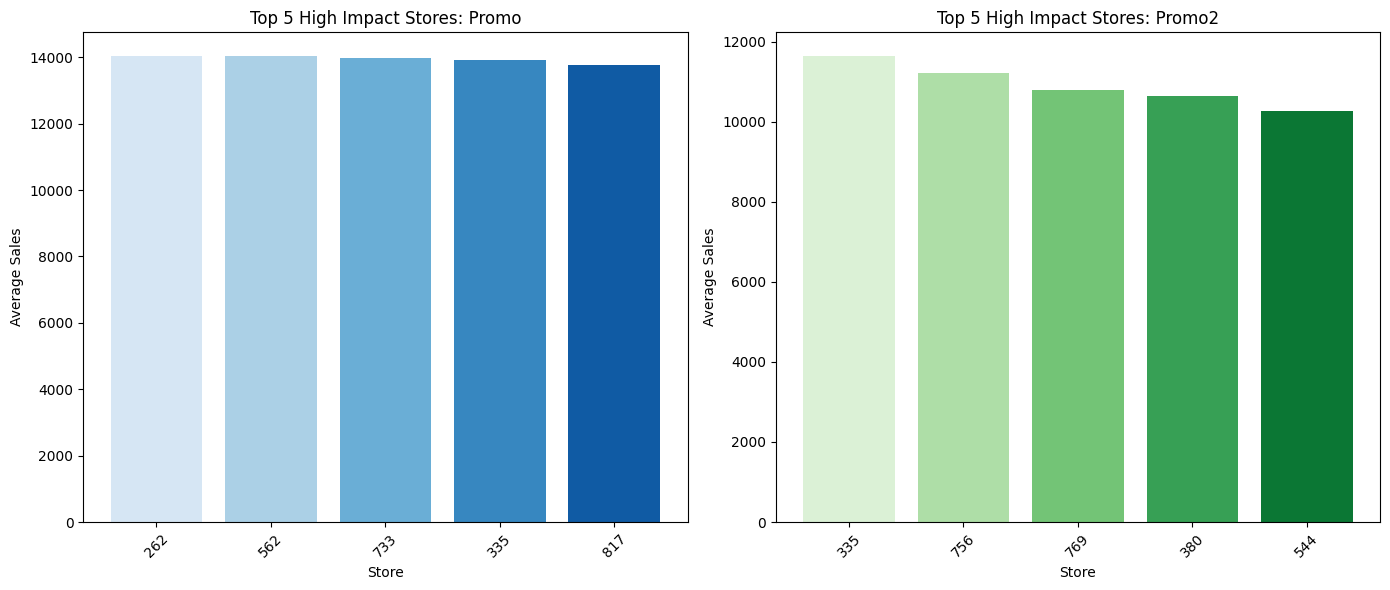

In [26]:
logger.info('Identifying high impact stores in each promotion types')
# Visualize highest Store Impact on Promotions
vlyr._high_impact_stores(top_n=5)


**Summary**

- **Promo:** Stores like 817 and 1114 show the highest average sales and customer counts, indicating that single promotions significantly boost both metrics. Store 817, with an average of 24,679 in sales and over 3,000 customers, stands out as a top target for future promotions.

- **Promo2:** Continuous promotions (Promo2) have a smaller impact on sales, with Store 335 leading at 13,706 in sales. However, these stores still maintain strong customer counts, suggesting Promo2 helps retain customers but may yield lower sales growth compared to single promos.

**Comparison of Top High-Impact Stores: Promo vs Promo2**

In [27]:
logger.info('Comparing top high impact stores ')
 # Ensure 'Store', 'Promo', 'Promo2', 'Sales', and 'Customers' are present in the DataFrame
df = train_data.reset_index()
required_columns = {'Store', 'Promo', 'Promo2', 'Sales', 'Customers'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"One or more required columns are missing: {required_columns}")

# Filter for stores with Promo active and calculate the mean Sales and Customers by store
promo_impact = df[df['Promo'] == 1][['Store', 'Sales', 'Customers']].groupby('Store').mean().reset_index()

# Filter for stores with Promo2 active and calculate the mean Sales and Customers by store
promo2_impact = df[df['Promo2'] == 1][['Store', 'Sales', 'Customers']].groupby('Store').mean().reset_index()

# Merge data for comparison
common_stores_comparison = pd.merge(promo_impact, promo2_impact, on='Store', suffixes=('_Promo', '_Promo2'))


2024-09-21 19:19:46,060 - INFO - Comparing top high impact stores 


In [28]:
common_stores_comparison.sort_values(by='Sales_Promo2', ascending=False).head(5)

,Store,Sales_Promo,Customers_Promo,Sales_Promo2,Customers_Promo2
171,335,13905.186111,1483.211111,11646.879512,1465.936306
391,756,13586.915278,1440.347222,11222.039278,1223.958599
396,769,11436.487500,1485.000000,10779.710722,1484.375796
196,380,13553.891667,1393.313889,10634.067410,1097.483015
280,544,13597.625000,1451.769444,10271.975584,1204.463907


**Summary**

- **Promo** drives higher sales compared to Promo2. For example, Store 335 and Store 756 see significantly better sales during Promo. This Promo also attracts more customers in most cases than Promo2


Trends of customer behavior during store opening and closing times


2024-09-21 19:19:58,637 - INFO - Analyzing the trends of the customer behavior


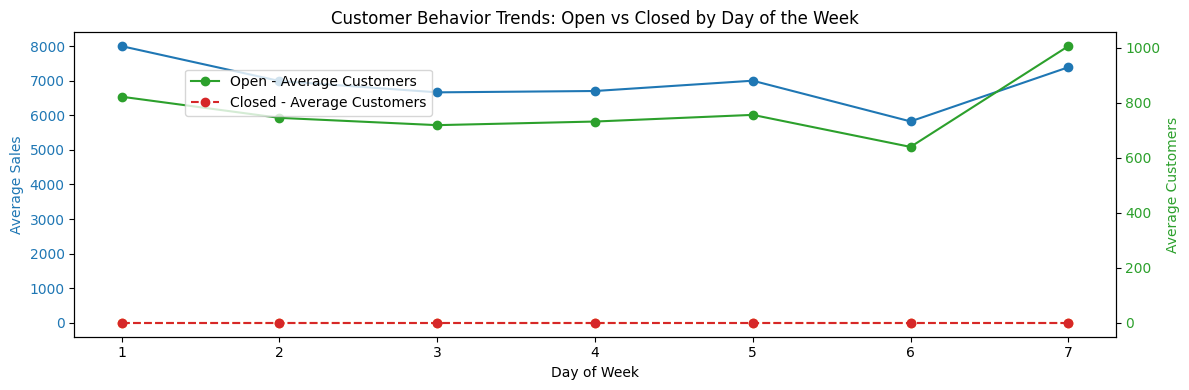

In [29]:
logger.info('Analyzing the trends of the customer behavior')
# Analyze trends of customer behavior
vlyr.analyze_trend()


**Trend Analysis Result**

- The number of customers remains relatively stable during weekdays when the store is open.

- Sales show a slight decline through weekdays but drop notably on the last weekday (Day 5). However, there is a significant increase in both customer numbers and sales from the weekend days (Day 6-7).

**Closed Times:**

- Both customer numbers and sales remain constant at zero when the store is closed, as expected.


Which stores are open on all weekdays? How does that affect their sales on weekends? 


In [30]:
# Ensure you have the correct DataFrame and reset index if 'Store' is the index
data = train_data.copy()  # Use your actual DataFrame
data = data.reset_index()  # Ensure 'Store' is a column, not the index

# Filter stores open on weekdays (Monday to Friday) and group by 'Store'
weekday_open_stores = data[(data['DayOfWeek'] <= 5) & (data['Open'] == 1)]

# Count the number of unique weekdays each store is open
open_weekday_stores = weekday_open_stores.groupby('Store')['DayOfWeek'].nunique()

# Identify stores that are open on all weekdays (5 days)
open_all_weekdays = open_weekday_stores[open_weekday_stores == 5].index

# Calculate average weekend sales for stores open all weekdays
weekend_sales = data[(data['Store'].isin(open_all_weekdays)) & (data['DayOfWeek'] >= 6)]
weekend_sales_summary = weekend_sales.groupby('Store')['Sales'].mean()

# Calculate average weekday sales for the same stores
weekday_sales = data[(data['Store'].isin(open_all_weekdays)) & (data['DayOfWeek'] <= 5)]
weekday_sales_summary = weekday_sales.groupby('Store')['Sales'].mean()

# Create a DataFrame comparing average weekday and weekend sales
comparison = pd.DataFrame({
    'Weekday Sales': weekday_sales_summary,
    'Weekend Sales': weekend_sales_summary
})

# Display the comparison DataFrame
display(comparison.sort_values(by='Weekday Sales', ascending=False))


,Weekday Sales,Weekend Sales
Store,,
262,14048.120178,14046.367537
562,14019.243323,13733.414179
733,13768.632047,13585.423507
1114,13518.346439,7024.750000
788,13507.895401,6991.274254
...,...,...
794,3076.216617,1238.820896
543,2914.200297,802.671642
307,2869.813056,671.895522


2024-09-21 19:20:11,839 - INFO - Visualizing which store are open in all weekdays


<Figure size 1000x600 with 0 Axes>

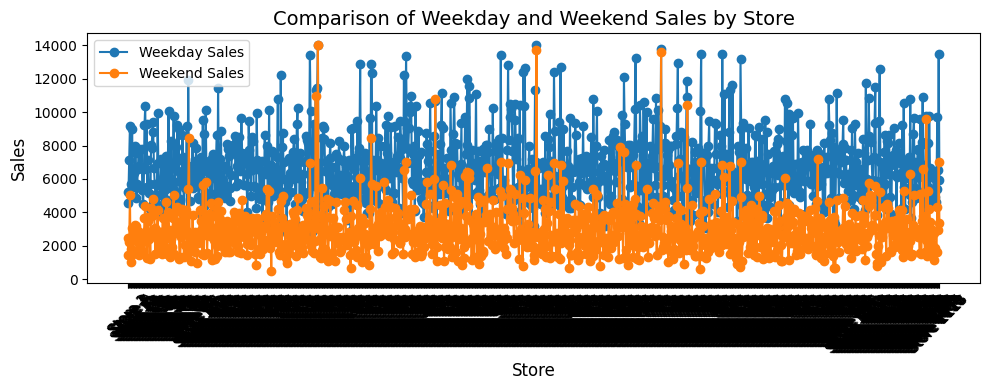

In [31]:
logger.info('Visualizing which store are open in all weekdays')
# Visualize the comparison for better understanding
plt.figure(figsize=(10, 6))
sales_comparison = comparison.copy()
plt.figure(figsize=(10, 4))

# Plot lines for weekday and weekend sales
plt.plot(sales_comparison.index, sales_comparison['Weekday Sales'], marker='o', label='Weekday Sales', color='#1f77b4')
plt.plot(sales_comparison.index, sales_comparison['Weekend Sales'], marker='o', label='Weekend Sales', color='#ff7f0e')

# Labels and formatting
plt.xlabel('Store', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Comparison of Weekday and Weekend Sales by Store', fontsize=14)
plt.xticks(sales_comparison.index, ['Store ' + str(i) for i in sales_comparison.index], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Summary**

**Higher Weekday Sales Correlate with Higher Weekend Sales:**

- Stores with higher sales during weekdays tend to also have higher sales on weekends.

**Sales Trend**

- There seems to be a pattern where stores that perform better during the weekdays also perform better on weekends. This suggests that strong weekday performance may contribute to better weekend sales.

Check how the assortment type affects sales

2024-09-21 19:20:25,332 - INFO - Visualizing the sales by assortemnt type


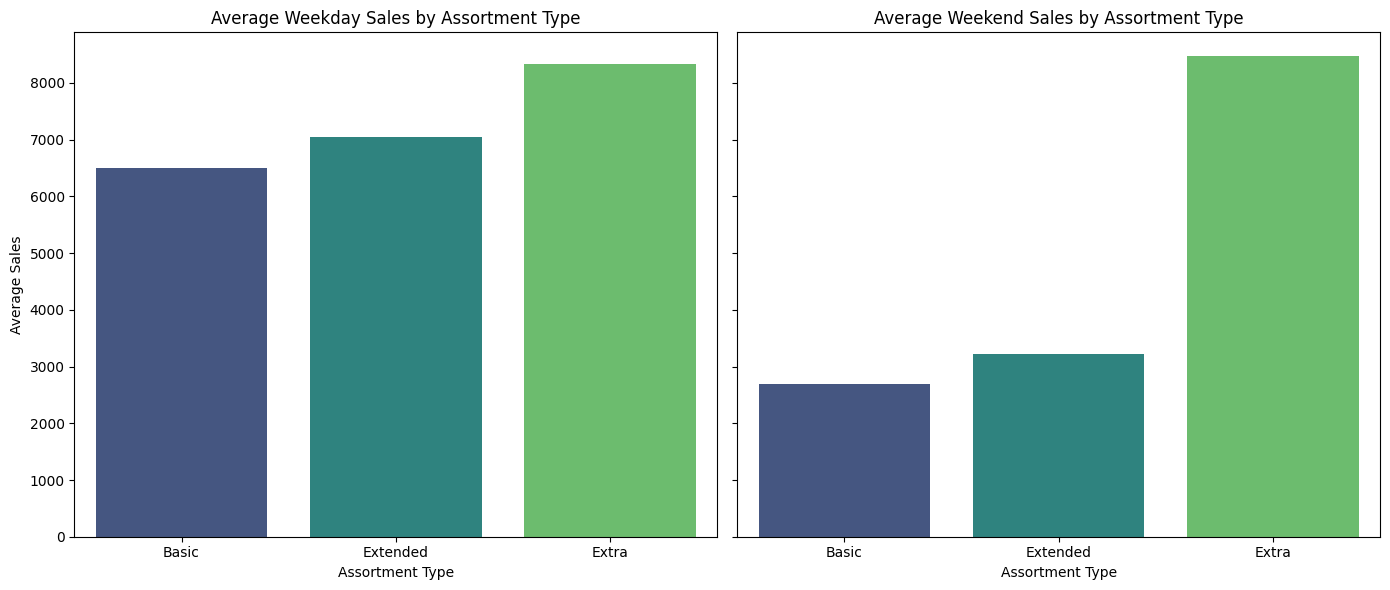

In [32]:
logger.info('Visualizing the sales by assortemnt type')
# Visualize the sales by assortment
vlyr.plot_assortment_sales()


**Summary**

**Weekday Sales:**

- **Extended and Extra** assortment types have consistently higher average weekday sales compared to the Basic assortment type.

- **Extra** has the highest average weekday sales, suggesting that it attracts customers with higher spending power or a demand for a wider range of products.

**Weekend Sales:**

- The Extra assortment type again shows the highest average weekend sales. However, the difference between Extended and Basic is less pronounced on weekends, indicating that the impact of assortment type might be less significant during this period.

How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?


To explore how the distance to the nearest competitor affects sales, the key variable to consider is CompetitionDistance

- Step 1: Plot Sales vs. CompetitionDistance.

- Step 2: Group stores into distance bins and compare average sales across those bins.

- Step 3: Add filters for city centers (if possible) and rerun the 
analysis to see if the effect of CompetitionDistance changes.

- Step 4: Explore interactions with Promo, StateHoliday, SchoolHoliday, StoreType, and Assortment.

2024-09-21 19:20:31,874 - INFO - Understanding sales vs competition distance


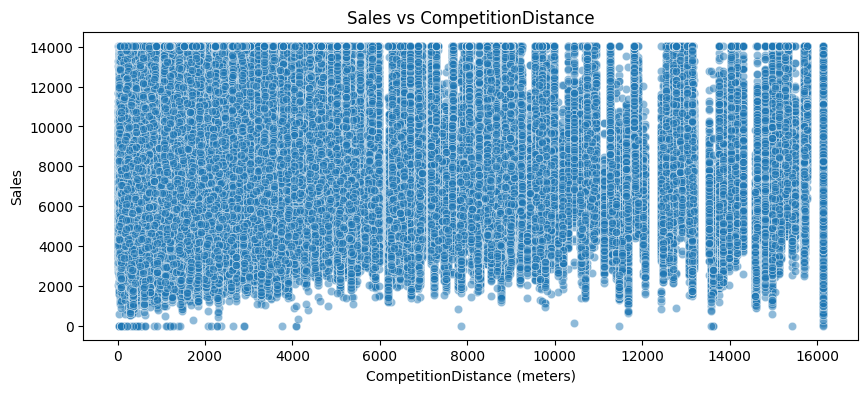

In [33]:
logger.info('Understanding sales vs competition distance')
# Filter the data to only include stores that are open
df = train_data[train_data['Open'] == 1]

# Scatter plot: Sales vs CompetitionDistance
plt.figure(figsize=(10,4))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df, alpha=0.5)
plt.title('Sales vs CompetitionDistance')
plt.xlabel('CompetitionDistance (meters)')
plt.ylabel('Sales')
plt.show()

 Grouping Stores by Distance

2024-09-21 19:20:38,067 - INFO - Grouping sales by distance
/tmp/ipykernel_14489/1430989928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'DistanceBin'] = pd.cut(df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)


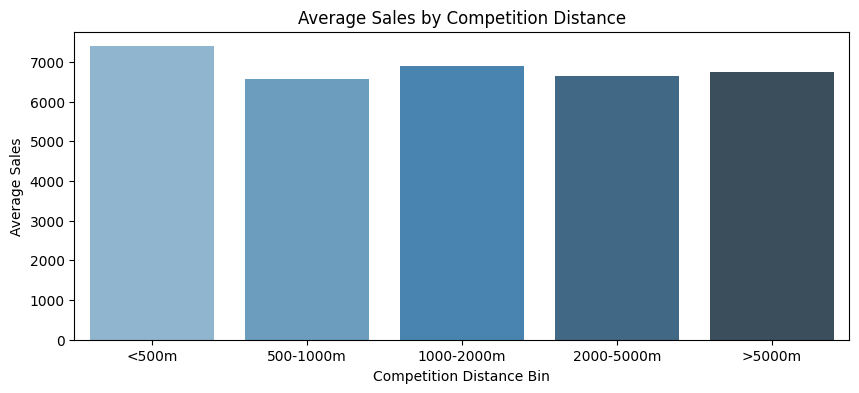

In [34]:
logger.info('Grouping sales by distance')
# Create bins for CompetitionDistance
bins = [0, 500, 1000, 2000, 5000, df['CompetitionDistance'].max()]
labels = ['<500m', '500-1000m', '1000-2000m', '2000-5000m', '>5000m']
df.loc[:,'DistanceBin'] = pd.cut(df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)

# Group by DistanceBin and calculate the mean Sales
distance_sales = df.groupby('DistanceBin', observed=False)['Sales'].mean().reset_index()

# Bar plot: Average Sales by Distance Bin
plt.figure(figsize=(10,4))
sns.barplot(x='DistanceBin', y='Sales', hue='DistanceBin', data=distance_sales, palette='Blues_d')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance Bin')
plt.ylabel('Average Sales')
plt.show()


City Center Analysis

2024-09-21 19:20:44,431 - INFO - Identifying the city center
/tmp/ipykernel_14489/190092766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'CityCenter'] = df['CompetitionDistance'] < 500


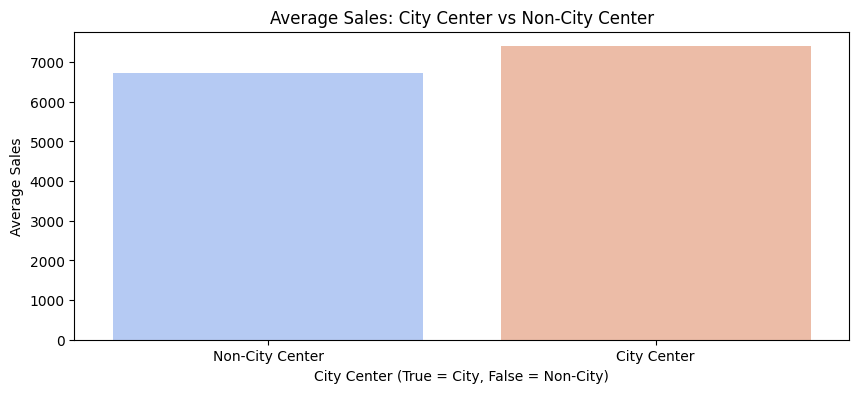

In [35]:
logger.info('Identifying the city center')
# Create a flag for city center stores (CompetitionDistance < 500 meters)
df.loc[:,'CityCenter'] = df['CompetitionDistance'] < 500

# Compare sales for stores in city centers vs non-city centers
city_vs_non_city = df.groupby('CityCenter')['Sales'].mean().reset_index()

# Bar plot: Average Sales in City Center vs Non-City Center
plt.figure(figsize=(10,4))
sns.barplot(x='CityCenter', y='Sales', hue='CityCenter', legend=False, data=city_vs_non_city, palette='coolwarm')
plt.title('Average Sales: City Center vs Non-City Center')
plt.xlabel('City Center (True = City, False = Non-City)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-City Center', 'City Center'])
plt.show()


**Key Insights**

- Stores with nearby competitors (<500m) outperform other stores in terms of sales, likely due to higher customer foot traffic and location in busy areas like city centers.

- Mid-range competition (1000-2000m) also supports slightly higher-than-average sales, suggesting that stores in moderately competitive zones still perform well, perhaps benefiting from drawing customers from a wider range of stores.

- City-center stores show significantly higher average sales than non-city-center stores, which highlights the importance of location in terms of foot traffic and competition.

Interaction with Promotions

2024-09-21 19:20:50,855 - INFO - How Competition distance interacting with promotion
/home/noh/10Academy/rossmann-pharma-sales-prediction/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


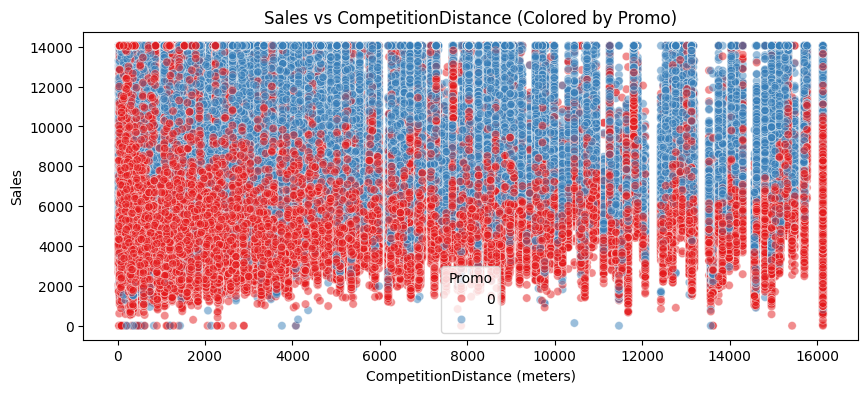

In [36]:
logger.info('How Competition distance interacting with promotion')
# Plot the effect of CompetitionDistance on Sales, colored by Promo
plt.figure(figsize=(10,4))
sns.scatterplot(x='CompetitionDistance', y='Sales', hue='Promo', data=df, alpha=0.5, palette='Set1')
plt.title('Sales vs CompetitionDistance (Colored by Promo)')
plt.xlabel('CompetitionDistance (meters)')
plt.ylabel('Sales')
plt.legend(title='Promo')
plt.show()


How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

To analyze how the opening or reopening of new competitors affects stores, particularly for those with initially missing competitor distance values (NA) that later receive valid distances, you can follow these steps:

- Filter the Data: Identify stores where CompetitionDistance is NA and then check for subsequent entries where this field has valid values.

- Analyze Sales Performance: Compare sales performance before and after the distance to competitors becomes available.

- Summarize Findings: Look for trends, such as changes in sales, customer counts, or any patterns indicating the impact of nearby competitors

In [37]:
logger.info('Analyzing the stores before and after opening ')
# Step 1: Ensure the 'CompetitionDistance' and 'CompetitionOpenSinceMonth/Year' columns are properly set
data = train_data.reset_index()

# Step 2: Filter stores with initially missing CompetitionDistance (implying no competitor initially)
stores_with_missing_competition = missing_competition.reset_index()

# Step 3: Get unique stores with missing competition distance
unique_stores_with_na = stores_with_missing_competition['Store'].unique()

# Step 4: Check for subsequent entries of these stores where CompetitionDistance becomes non-NA
# Additionally, look for valid CompetitionOpenSinceMonth and Year
stores_with_competition_appeared = data[
    (data['Store'].isin(unique_stores_with_na)) & 
    (data['CompetitionDistance'].notna()) & 
    (data['CompetitionOpenSinceMonth'].notna()) & 
    (data['CompetitionOpenSinceYear'].notna())
]

# Step 5: Compare sales before and after the competitor opening (based on CompetitionOpenSinceMonth/Year)
before_after_analysis = []

for store in unique_stores_with_na:
    # Get the data for this store
    store_data = data[data['Store'] == store].copy()
    
    # Find the first entry where the competitor opened (non-NA CompetitionDistance)
    first_valid_competition_entry = store_data[store_data['CompetitionDistance'].notna()].index.min()
    
    # Ensure CompetitionOpenSinceMonth/Year is present to track when the competitor opened
    if pd.notna(first_valid_competition_entry):
        competition_open_date = store_data.loc[first_valid_competition_entry, ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]
        
        # Calculate sales before and after the competitor opening
        before_competition_sales = store_data.loc[:first_valid_competition_entry - 1, 'Sales'].mean()
        after_competition_sales = store_data.loc[first_valid_competition_entry:, 'Sales'].mean()
        
        # Append results to the list
        before_after_analysis.append({
            'Store': store,
            'Before Competitor (Sales)': before_competition_sales,
            'After Competitor (Sales)': after_competition_sales
        })

# Convert the list to a DataFrame
before_after_analysis_df = pd.DataFrame(before_after_analysis)

# Step 6: Display the analysis of sales before and after competitor appearance
display(before_after_analysis_df)

2024-09-21 19:21:42,479 - INFO - Analyzing the stores before and after opening 


,Store,Before Competitor (Sales),After Competitor (Sales)
0,291,NaN,6606.763270
1,622,NaN,3593.717622
2,879,NaN,3087.831135


**Key Findings:**

**Sales Before Competitor Presence:** For the stores analyzed (Store 291, Store 622, and Store 879), there were no sales data available prior to the competitors opening, as indicated by the NaN values. This suggests that these stores may have been newly established or their sales data was not captured before the competitors became relevant.

**Sales After Competitor Opening:**

Store 291 recorded an average sales figure of 6643.28 after the competitor opened.
Store 622 showed average sales of 3593.72.
Store 879 achieved average sales of 3087.83.

In [38]:
# Save both the test and train data to csv for preprocessing
train_ = train_data.reset_index()
train_.to_csv('../data/train_cleaned.csv', index=False)
test_data.to_csv('../data/test_cleaned.csv', index=False)

In [40]:
test_data.shape

(41088, 14)